R²: 0.6814
RMSE: 100.45
MAE: 74.11


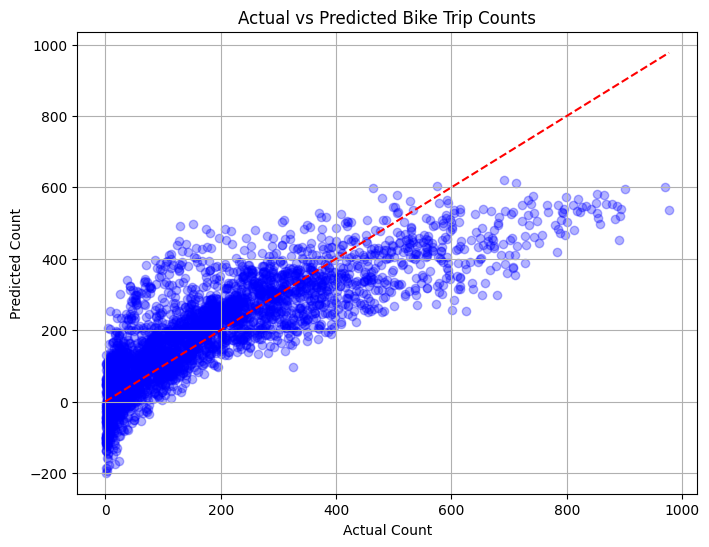

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Load data
df = pd.read_csv('hour.csv')

# Select features and target
features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
            'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X = df[features]
y = df['cnt']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['season', 'mnth', 'hr', 'weekday', 'weathersit'], drop_first=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Bike Trip Counts')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.grid(True)
plt.show()
